<a href="https://colab.research.google.com/github/naitik182003/Complete-Python-3-Bootcamp/blob/master/FinalPRMLcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Career Guidance System**

In [47]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import joblib  # For saving and loading models


In [48]:
# Load dataset
url = 'https://raw.githubusercontent.com/Nantha-1998/404-CODER/master/career_compute_dataset.csv'
df = pd.read_csv(url)

Thus, we have categorical data and categorical target.

For  Feature Selection :

We propose to use:

1. Chi-Squared Statistic.
2. Mutual Information Statistic.



In [49]:
# Preprocess data
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(df.iloc[:, -1])  # Encode target column
X = df.iloc[:, :-1]  # Features

In [50]:

# Encode non-numeric columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

In [51]:
# Split data for each model
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=20)  # Decision Tree
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=10)  # XGBoost
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=15)  # SVM


A bar chart of the feature importance scores for each input feature is created.



So, from above plot we remove the features with lower importance scores (<1.5).

Hence features 2,5,8,9,14,16,21,22,23 are not considered,

We could set k=16 i.e (25-9)  When configuring the SelectKBest to select these top 16 features

In [52]:
# Feature selection
def select_features(X_train, y_train, X_test, k=5, method=chi2):
    selector = SelectKBest(score_func=method, k=k)
    selector.fit(X_train, y_train)
    return selector.transform(X_train), selector.transform(X_test), selector.scores_

Mutual Info Classification

In [53]:
# Apply feature selection
X_train_fs1, X_test_fs1, fs1_scores = select_features(X_train1, y_train1, X_test1, k=5, method=mutual_info_classif)
X_train_fs2, X_test_fs2, fs2_scores = select_features(X_train2, y_train2, X_test2, k=5, method=mutual_info_classif)
X_train_fs3, X_test_fs3, fs3_scores = select_features(X_train3, y_train3, X_test3, k=5, method=mutual_info_classif)

In [60]:
from sklearn.utils.multiclass import unique_labels

def evaluate_decision_tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Correct dynamic labels for confusion matrix
    labels = unique_labels(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    cm_display.plot(cmap="Blues")
    plt.title("Confusion Matrix - Decision Tree")
    plt.show()

    print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")
    return accuracy * 100, model

def evaluate_svm(X_train, y_train, X_test, y_test):
    model = SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Correct dynamic labels for confusion matrix
    labels = unique_labels(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    cm_display.plot(cmap="Blues")
    plt.title("Confusion Matrix - SVM")
    plt.show()

    print(f"SVM Accuracy: {accuracy * 100:.2f}%")
    return accuracy * 100, model

from sklearn.model_selection import StratifiedKFold

# Stratified Split for consistent class distribution
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.3, random_state=10, stratify=y
)

def evaluate_xgboost(X_train, y_train, X_test, y_test):
    model = XGBClassifier()

    # Align classes for XGBoost
    unique_classes_train = np.unique(y_train)
    unique_classes_test = np.unique(y_test)
    common_classes = np.intersect1d(unique_classes_train, unique_classes_test)

    if len(common_classes) < len(unique_classes_train):
        print(f"Warning: Missing classes in test set: {set(unique_classes_train) - set(common_classes)}")
    if len(common_classes) < len(unique_classes_test):
        print(f"Warning: Missing classes in train set: {set(unique_classes_test) - set(common_classes)}")

    # Fit and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    labels = unique_labels(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    cm_display.plot(cmap="Blues")
    plt.title("Confusion Matrix - XGBoost")
    plt.show()

    print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")
    return accuracy * 100, model



Accuracies vs Techniques


Without Feature Selection:


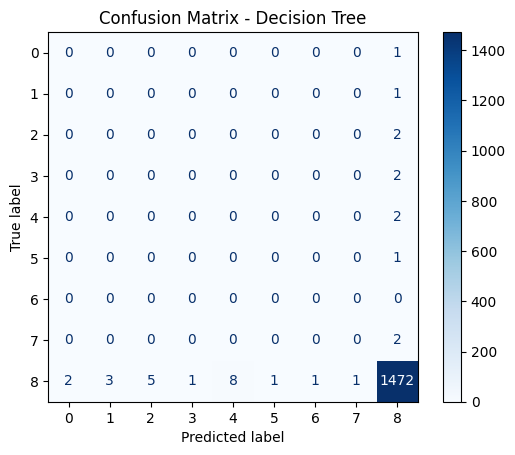

Decision Tree Accuracy: 97.81%


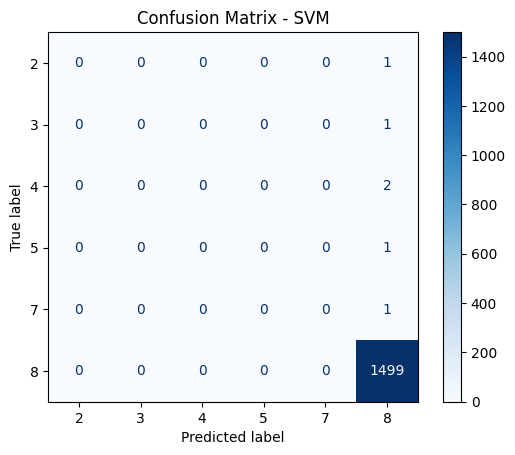

SVM Accuracy: 99.60%


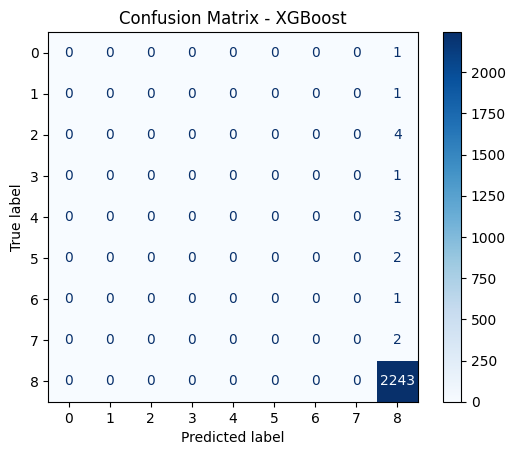

XGBoost Accuracy: 99.34%


In [61]:
# Evaluate models
print("\nWithout Feature Selection:")
acc_tree, tree_model = evaluate_decision_tree(X_train1, y_train1, X_test1, y_test1)
acc_svm, svm_model = evaluate_svm(X_train3, y_train3, X_test3, y_test3)
acc_xgb, xgb_model = evaluate_xgboost(X_train2, y_train2, X_test2, y_test2)

Prediction for new input


With Feature Selection:


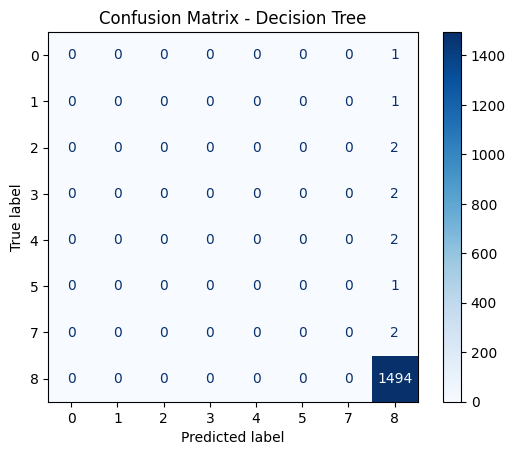

Decision Tree Accuracy: 99.27%


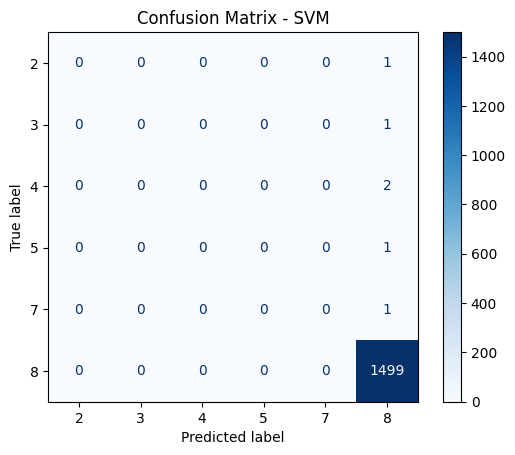

SVM Accuracy: 99.60%


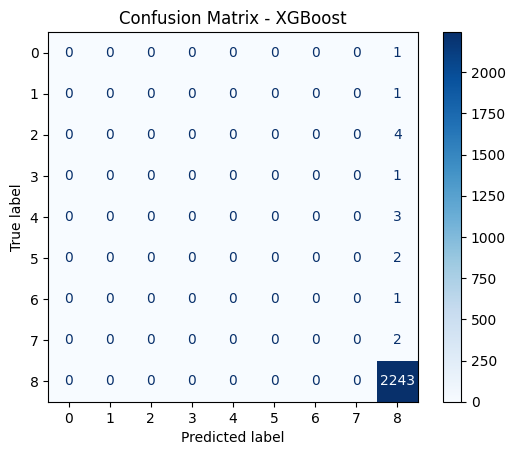

XGBoost Accuracy: 99.34%


In [63]:
# Save models
joblib.dump(tree_model, 'decision_tree_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')

print("\nWith Feature Selection:")
acc_tree_fs, tree_model_fs = evaluate_decision_tree(X_train_fs1, y_train1, X_test_fs1, y_test1)
acc_svm_fs, svm_model_fs = evaluate_svm(X_train_fs3, y_train3, X_test_fs3, y_test3)
acc_xgb_fs, xgb_model_fs = evaluate_xgboost(X_train_fs2, y_train2, X_test_fs2, y_test2)

In [64]:
# Save feature-selected models
joblib.dump(tree_model_fs, 'decision_tree_model_fs.pkl')
joblib.dump(svm_model_fs, 'svm_model_fs.pkl')
joblib.dump(xgb_model_fs, 'xgb_model_fs.pkl')

['xgb_model_fs.pkl']

Algorithms : SVM, Decision Tree and XGBoost

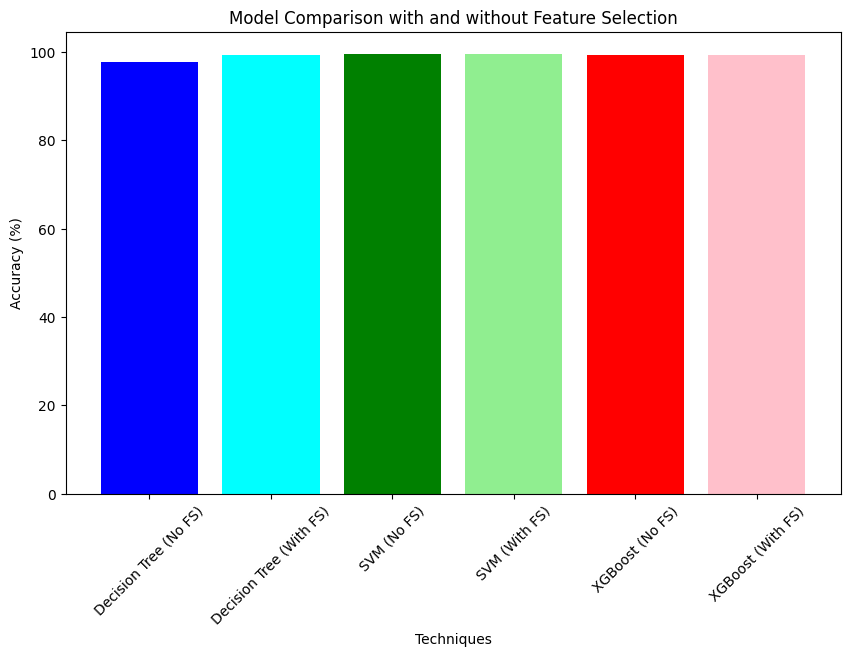

In [65]:
# Bar chart for comparison
techniques = [
    "Decision Tree (No FS)", "Decision Tree (With FS)",
    "SVM (No FS)", "SVM (With FS)",
    "XGBoost (No FS)", "XGBoost (With FS)"
]
accuracies = [acc_tree, acc_tree_fs, acc_svm, acc_svm_fs, acc_xgb, acc_xgb_fs]

plt.figure(figsize=(10, 6))
plt.bar(techniques, accuracies, color=['blue', 'cyan', 'green', 'lightgreen', 'red', 'pink'])
plt.ylabel("Accuracy (%)")
plt.xlabel("Techniques")
plt.title("Model Comparison with and without Feature Selection")
plt.xticks(rotation=45)
plt.show()

In [66]:
def make_prediction(model_path, input_data):
    """
    Load the model from the given path and make predictions.
    """
    model = joblib.load(model_path)
    if len(np.array(input_data).shape) == 1:  # Single sample
        input_data = np.array(input_data).reshape(1, -1)
    prediction = model.predict(input_data)
    return prediction

# Example usage:
print("\nPrediction Example:")
# Replace with actual input data, ensuring the same feature preprocessing is applied
sample_input = X.iloc[0, :].values  # Using a sample row from the dataset for testing
print(f"Input Data: {sample_input}")

pred_dt = make_prediction('decision_tree_model.pkl', sample_input)
pred_svm = make_prediction('svm_model.pkl', sample_input)
pred_xgb = make_prediction('xgb_model.pkl', sample_input)

print(f"Decision Tree Prediction: {labelencoder.inverse_transform(pred_dt)}")
print(f"SVM Prediction: {labelencoder.inverse_transform(pred_svm)}")
print(f"XGBoost Prediction: {labelencoder.inverse_transform(pred_xgb)}")



Prediction Example:
Input Data: [2 3 2 3 1 1 1 1 2 4 2 2 2 3 4 1 1 3 1 2 1 4 3 4 5]
Decision Tree Prediction: [nan]
SVM Prediction: [nan]
XGBoost Prediction: ['Technical Support']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [67]:
joblib.dump(labelencoder, 'labelencoder.pkl')

# Load it later for decoding predictions
loaded_labelencoder = joblib.load('labelencoder.pkl')
decoded_prediction = loaded_labelencoder.inverse_transform(pred_dt)
print(f"Decoded Prediction: {decoded_prediction}")


Decoded Prediction: [nan]


In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
import pandas as pd

# Initialize Flask app
app = Flask(__name__)

# Load models and label encoder
models = {
    "decision_tree": joblib.load("decision_tree_model.pkl"),
    "svm": joblib.load("svm_model.pkl"),
    "xgboost": joblib.load("xgb_model.pkl")
}
labelencoder = joblib.load("labelencoder.pkl")

# Feature columns (ensure consistency with the original dataset)
FEATURE_COLUMNS = ["feature1", "feature2", "feature3", "feature4", "feature5"]  # Replace with actual feature names

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Parse JSON input
        data = request.json
        model_name = data.get("model", "decision_tree").lower()  # Default to Decision Tree

        if model_name not in models:
            return jsonify({"error": f"Model '{model_name}' not found. Available models: {list(models.keys())}"}), 400

        # Extract features
        features = data.get("features")
        if not features or len(features) != len(FEATURE_COLUMNS):
            return jsonify({"error": f"Invalid features. Expected {len(FEATURE_COLUMNS)} features: {FEATURE_COLUMNS}"}), 400

        # Prepare input data
        input_data = np.array(features).reshape(1, -1)
        model = models[model_name]

        # Predict and decode result
        prediction = model.predict(input_data)
        decoded_prediction = labelencoder.inverse_transform(prediction)

        return jsonify({"model": model_name, "prediction": decoded_prediction.tolist()})

    except Exception as e:
        return jsonify({"error": str(e)}), 500

@app.route('/models', methods=['GET'])
def get_models():
    """Endpoint to list available models."""
    return jsonify({"available_models": list(models.keys())})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
